## Few nice tricks for adding preprocessing of your data

1. Polynomial features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

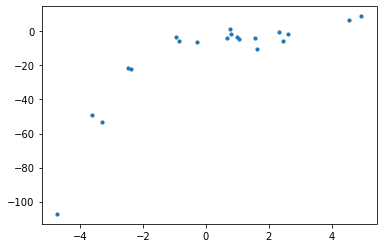

In [2]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

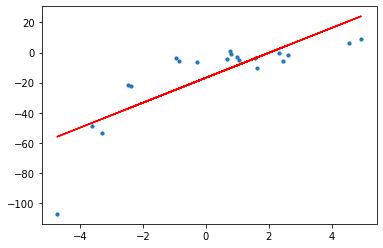

In [4]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#RMSE
np.sqrt(mean_squared_error(y, y_pred))

15.908242501429998

In [14]:
#R2
r2_score(y, y_pred)

0.6386750054827146

Straight line might not be the best in this case, we could try to introduce Polynomial Features. 

Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target.They are mostly used to add complexity to linear models with little features, or when we suspect the effect of one feature is dependent on another feature.

Sklearn provides a PolynomialFeatures class to create polynomial features from scratch. The degree parameter determines the maximum degree of the polynomial. For example, when degree is set to two and X=x1, x2, the features created will be 1, x1, x2, x1², x1x2 and x2². The interaction_only parameter let the function know we only want the interaction features, i.e. 1, x1, x2 and x1x2.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [29]:
x

(array([-4.7226796]),
 array([-3.60267397]),
 array([-3.29215704]),
 array([-2.48223722]),
 array([-2.36282052]),
 array([-0.93621395]),
 array([-0.85026525]),
 array([-0.28311318]),
 array([0.6684103]),
 array([0.76820449]),
 array([0.79952837]),
 array([0.99897702]),
 array([1.0607969]),
 array([1.56786929]),
 array([1.63497495]),
 array([2.30965656]),
 array([2.45407162]),
 array([2.61547479]),
 array([4.56228722]),
 array([4.93183364]))

In [30]:
#1, x1, x1^2
x_poly

array([[ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        , -3.29215704, 10.83829796],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  4.56228722, 20.81446466],
       [ 1.        ,  4.93183364, 24.32298305]])

In [31]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [32]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

23.20425103834196
0.23124366071264557


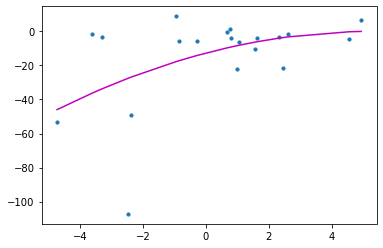

In [33]:
import operator

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [34]:
def create_polynomial_regression_model(degree, X_train, X_test, y_train, y_test):
  #"Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [35]:
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
target = pd.Series(boston['target'])

In [36]:
data[['LSTAT', 'RM']]

LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns]

In [41]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(data[['LSTAT', 'RM']])

In [47]:
32.74*6.575

215.26550000000003

In [48]:
#Degree 3
#1, X1, X2, X1^2, X1X2, X2^2, X1^3, X1*X1X2, X2*X1X2, X2^3
pd.DataFrame(x_poly, columns = ['1', 'X1', 'X2', 'X1^2', 'X1X2', 'X2^2', 'X1^3', 'X1*X1X2', 'X2*X1X2', 'X2^3'])

1    X1     X2     X1^2      X1X2       X2^2        X1^3     X1*X1X2  \
0    1.0  4.98  6.575  24.8004  32.74350  43.230625  123.505992  163.062630   
1    1.0  9.14  6.421  83.5396  58.68794  41.229241  763.551944  536.407772   
2    1.0  4.03  7.185  16.2409  28.95555  51.624225   65.450827  116.690866   
3    1.0  2.94  6.998   8.6436  20.57412  48.972004   25.412184   60.487913   
4    1.0  5.33  7.147  28.4089  38.09351  51.079609  151.419437  203.038408   
..   ...   ...    ...      ...       ...        ...         ...         ...   
501  1.0  9.67  6.593  93.5089  63.75431  43.467649  904.231063  616.504178   
502  1.0  9.08  6.120  82.4464  55.56960  37.454400  748.613312  504.571968   
503  1.0  5.64  6.976  31.8096  39.34464  48.664576  179.406144  221.903770   
504  1.0  6.48  6.794  41.9904  44.02512  46.158436  272.097792  285.282778   
505  1.0  7.88  6.030  62.0944  47.51640  36.360900  489.303872  374.429232   

        X2*X1X2        X2^3  
0    215.288513  284.241359  
1    376.835263  264.732956  
2    208.045627  370.920057  
3    143.977692  342.706084  
4    272.254316  365.065966  
..          ...         ...  
501  420.332166  286.582210  
502  340.085952  229.220928  
503  274.468209  339.484082  
504  299.106665  313.600414  
505  286.523892  219.256227  

[506 rows x 10 columns]

In [40]:
pd.DataFrame(x_poly, columns = ['1', 'LSTAT', 'RM', 'LSTAT^2', 'LSTAT*RM', 'RM^2'])

1  LSTAT     RM  LSTAT^2  LSTAT*RM       RM^2
0    1.0   4.98  6.575  24.8004  32.74350  43.230625
1    1.0   9.14  6.421  83.5396  58.68794  41.229241
2    1.0   4.03  7.185  16.2409  28.95555  51.624225
3    1.0   2.94  6.998   8.6436  20.57412  48.972004
4    1.0   5.33  7.147  28.4089  38.09351  51.079609
..   ...    ...    ...      ...       ...        ...
501  1.0   9.67  6.593  93.5089  63.75431  43.467649
502  1.0   9.08  6.120  82.4464  55.56960  37.454400
503  1.0   5.64  6.976  31.8096  39.34464  48.664576
504  1.0   6.48  6.794  41.9904  44.02512  46.158436
505  1.0   7.88  6.030  62.0944  47.51640  36.360900

[506 rows x 6 columns]

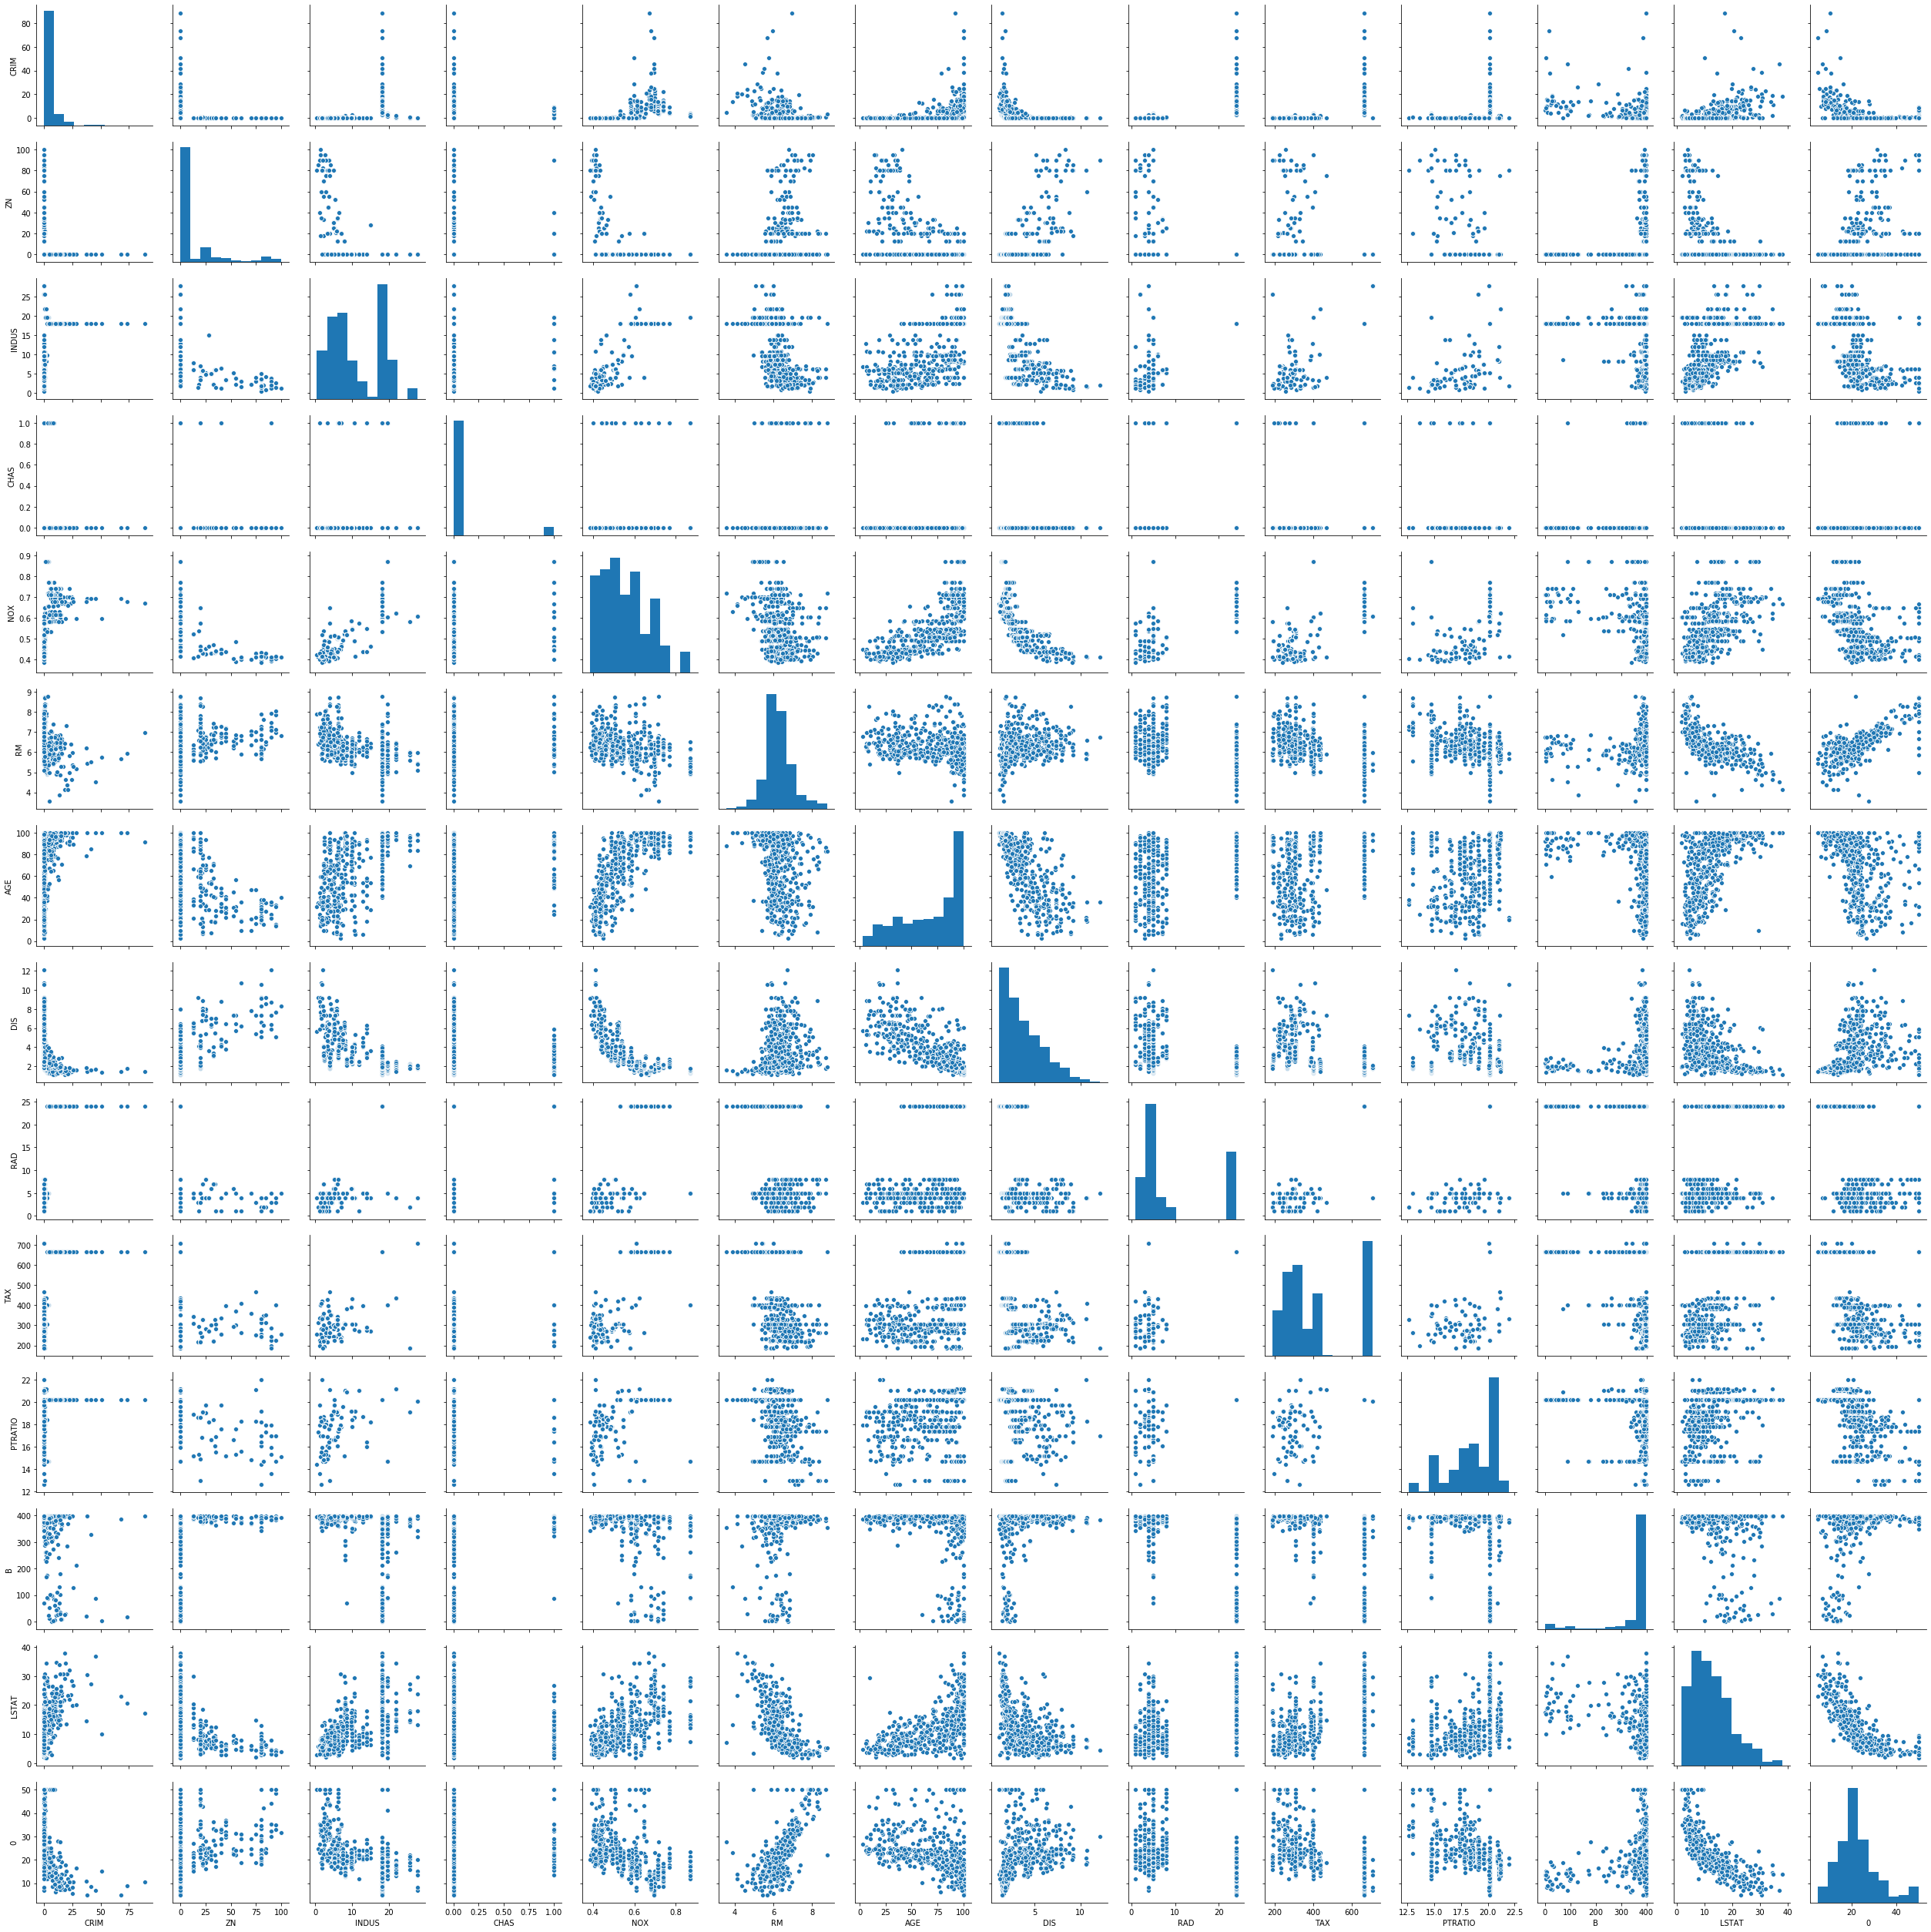

In [27]:
sns.pairplot(pd.concat([data, target], axis =1))

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 101)

In [56]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.3473299448329072
R2 score of training set is 0.9286436422690493


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.248496406009073
R2 score of test set is 0.839116416884691


2. Numerical Encoding

# Discretization

Discretization, also known as quantization or binning, divides a continuous feature into a pre-specified number of categories (bins), and thus makes the data discrete.

One of the main goals of a discretization is to significantly reduce the number of discrete intervals of a continuous attribute. Hence, why this transformation can increase the performance of tree based models.


In [57]:
data_test = data[['LSTAT']]

In [63]:
data_test['LSTAT_bin'] = pd.cut(data['LSTAT'], bins = 3, labels = [0,1,2])

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
pd.cut(data['LSTAT'], bins = 3)

0      (1.694, 13.81]
1      (1.694, 13.81]
2      (1.694, 13.81]
3      (1.694, 13.81]
4      (1.694, 13.81]
            ...      
501    (1.694, 13.81]
502    (1.694, 13.81]
503    (1.694, 13.81]
504    (1.694, 13.81]
505    (1.694, 13.81]
Name: LSTAT, Length: 506, dtype: category
Categories (3, interval[float64]): [(1.694, 13.81] < (13.81, 25.89] < (25.89, 37.97]]

In [64]:
data_test

LSTAT LSTAT_bin
0     4.98         0
1     9.14         0
2     4.03         0
3     2.94         0
4     5.33         0
..     ...       ...
501   9.67         0
502   9.08         0
503   5.64         0
504   6.48         0
505   7.88         0

[506 rows x 2 columns]

# Binarization

Feature binarization is the process of tresholding numerical features to get boolean values. Or in other words, assign a boolean value (True or False) to each sample based on a threshold. Note that binarization is an extreme form of two-bin discretization.

In general binarization is useful as a feature engineering technique for creating new features that indicate something meaningful.

In [80]:
data_test['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [65]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=10, copy=True)
data_test['binarizer_bins']= binarizer.fit_transform(data_test['LSTAT'].values.reshape(-1, 1))

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
data_test.head(10)

LSTAT LSTAT_bin  binarizer_bins
0   4.98         0             0.0
1   9.14         0             0.0
2   4.03         0             0.0
3   2.94         0             0.0
4   5.33         0             0.0
5   5.21         0             0.0
6  12.43         0             1.0
7  19.15         1             1.0
8  29.93         2             1.0
9  17.10         1             1.0

# Regular Expression

In [69]:
import re

months = ['February','March','April','May', 'June']
for month in months:
    if re.search(r'a', month):
        print(month)

February
March
May


In [67]:
#using ^
hello_list = ['hello', 'world', 'hello world', 'helloworld', '1hello world']
for word in hello_list:
    if re.search(r'^hello', word):
        print(word)

hello
hello world
helloworld


In [68]:
#using $
hello_list = ['hello', 'world', 'hello world', 'helloworld', '1hello world']
for word in hello_list:
    if re.search(r'world$', word):
        print(word)

world
hello world
helloworld
1hello world


In [82]:
# using *
cat_list = ['ct', 'cat', 'caat', 'caaaaaat', 'cabt' ]
for cat in cat_list:
    if re.search(r'c+a*t', cat):
        print(cat)


ct
cat
caat
caaaaaat


In [71]:
# using +
cat_list = ['ct', 'cat', 'caat', 'caaaaaat']
for cat in cat_list:
    if re.search(r'ca+t', cat):
        print(cat)

cat
caat
caaaaaat


In [72]:
# using?
dash_list = ['dashboard', 'dash-board', 'dash--board']
for item in dash_list:
    if re.search(r'dash-?board', item):
        print(item)


dashboard
dash-board


In [73]:
# using{m,n}
ab_list = ['ab', 'aob', 'aoob', 'aooob', 'aoooob']
for item in ab_list:
    if re.search(r'ao{3}b', item):
        print(item)

aooob


In [97]:
#using set
string = 'February March April May June 123'
match = re.findall(r'[a-zA-Z]+', string)
print(match)

['February', 'March', 'April', 'May', 'June']


In [91]:
#using word boundary
string = 'February March April May June'
match = re.findall(r'M[a-zA-Z]+', string)
print(match)

['March', 'May']


In [77]:
string = 'February March April May June'
match = re.findall(r'[a-zA-Z]+y', string)
print(match)

['February', 'May']


In [98]:
#finding float
word = 'I want to eat rice 100.11 and 1012.445'
print(re.findall(r'\d+\.\d+', word))

['100.11', '1012.445']


In [104]:
#Multiline case
word = 'I want to eat rice\nI did not want to pay any money'
print(re.findall(r'^I\s[A-Z]+', word, flags= re.M|re.I))

['I want', 'I did']


In [93]:
#using sub
word = "Where 1 cat owner's is never been there!!"
print(re.sub(r'[^a-zA-Z\']', ' ', word))

Where   cat owner's is never been there  


In [94]:
#using split
word = "Only 2 time but 1 is enough. The ! is another sign"
print(re.split(r'[0-9.!]', word))

['Only ', ' time but ', ' is enough', ' The ', ' is another sign']


In [95]:
#using compile
regex = re.compile('[a-zA-Z0-9\']+')
word = "Do not feed the monkey's. It is really bad!!!"
print(regex.findall(word))
print(regex.sub('', word))


['Do', 'not', 'feed', 'the', "monkey's", 'It', 'is', 'really', 'bad']
    .    !!!
